M76 Final Project k Approximate Nearest Neighbors (kANN) \\
Author: Warren Shepard, Sri Korandla, Tushar Aggarwal \\
Date: 12 Aug 2024 \\
Credit:

In [1]:
# install pynndescent -- package for kANN
!pip install pynndescent

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.3 MB/s eta 0:00:00


In [2]:
import pynndescent
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.metrics.pairwise import euclidean_distances
import time
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons
from sklearn.semi_supervised import LabelSpreading
from scipy.sparse import lil_matrix # sparse matrix
from sklearn.datasets import fetch_20newsgroups_vectorized
from scipy.sparse import csr_matrix, lil_matrix
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Part 1: k Approximate Nearest Neighbors (kANN)

In this part, we define deterministic and randomized methods for kNN and kANN, respectively. For the randomized method, we use the `pynndescent.NNDescent` method from the `pynndescent` package. We also do some raw testing and comparison of the deterministic and randomized methods.

In [ ]:
'''
Generate a synthetic "toy dataset" with 10,000 samples and 1,000 features. This
will be used to demonstrate the kNN and kANN algorithms and show their raw acuraccy
an unprocessed data set (in contrast to how we used kNN in HW3, where SVD was completed
before applying kNN).
Split data into train and test sets
Scale the data
'''

# Generate a synthetic dataset with 10,000 samples and 1,000 features
X, y = make_classification(n_samples=10000, n_features=200, n_informative=50, n_classes=3, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# # Print the first 5 rows of the training data and labels
# print("First 5 rows of X_train:")
# print(X_train[:5])

# print("\nFirst 5 labels of y_train:")
# print(y_train[:5])


In [ ]:
def predict(neighbors_indices, y_train):
  '''
  Parameters:
  - neighbors_indices is the indices of the k nearest neighbors
  - y_train is the training labels

  Returns:
  - returns the predictions using a "majority rules" approach
  '''

  predictions = []
  for indices in neighbors_indices:

      # Get the labels of the k nearest neighbors
      neighbor_labels = y_train[indices]

      # Determine the most common class (majority vote) and add to predictions
      most_common = np.bincount(neighbor_labels).argmax()
      predictions.append(most_common)

  return np.array(predictions)

In [ ]:
def brute_force_knn(X_train, X_test, k=5):
    '''
    Parameters:
    - X_train is the training data
    - X_test is the test data
    - k is the number of neighbors to consider

    Returns:
    - the indices of the k nearest neighbors for each test point

    Brute force kNN algorithm. Logic is what you would expect: for every test point,
    go over the training points and find the k closest.

    IMPORTANT: we chose to write the raw code for this instead of use the model given
    in the sklearn package (NearestNeighbors from sklearn.neighbors) because that model is compiled in C,
    and therefore much faster whearas the randomized algorithms are all in Python.
    In order to compare runtime, all algorithms were written in Python.
    '''

    neighbors_indices = []
    for query in X_test:

        # Compute distances between the query point and all training points
        distances = euclidean_distances([query], X_train).flatten()

        # Get the indices of the k closest points
        nearest_indices = np.argsort(distances)[:k]
        neighbors_indices.append(nearest_indices)

    return neighbors_indices

In [ ]:
'''
Initial testing of the kNN and kANN algorithms
Here, we only test one value of k
'''

# Set the number of neighbors (k)
k = 5

# Query the DETERMINISTIC kNN
det_neighbors_indices = brute_force_knn(X_train, X_test, k)

# Assess deterministic accuracy
det_y_pred = predict(det_neighbors_indices, y_train)
# Evaluate the model
det_accuracy = accuracy_score(y_test, det_y_pred)
print(f'Deterministic Accuracy: {det_accuracy:.2f}')

# Query the RANDOMIZED kANN (recall: this involves a processing and querrying step!)
index = pynndescent.NNDescent(X_train, n_neighbors=k, random_state=42) # preprocessing
random_neighbors_indices, neighbors_distances = index.query(X_test, k=k)  # query

# Assess randomized accuracy
random_y_pred = predict(random_neighbors_indices, y_train)
# Evaluate the model
random_accuracy = accuracy_score(y_test, random_y_pred)
print(f'Randomized Accuracy: {random_accuracy:.2f}')

Deterministic Accuracy: 0.65
Randomized Accuracy: 0.54


In [ ]:
'''
Now, test for different values of k.
Also keep track of the runtime for each algorithm.
'''

# parameters
k_start = 1
k_end = 20

# initialize lists to keep track of statistics
det_accuracies = []
random_accuracies = []
det_times = []
random_times = []

# loop through different values of k
for k in range(k_start, k_end + 1):
    print(f"k = {k}")

    # Query and assess the DETERMINISTIC kNN
    det_start_time = time.time()
    det_neighbors_indices = brute_force_knn(X_train, X_test, k)
    det_end_time = time.time()

    det_y_pred = predict(det_neighbors_indices, y_train)
    det_accuracy = accuracy_score(y_test, det_y_pred)

    det_times.append(det_end_time - det_start_time)
    det_accuracies.append(det_accuracy)

    # Query the RANDOMIZED kANN
    random_start_time = time.time()
    index = pynndescent.NNDescent(X_train, n_neighbors=k, random_state=42) # preprocessing
    random_neighbors_indices, neighbors_distances = index.query(X_test, k=k)  # query
    random_end_time = time.time()

    random_y_pred = predict(random_neighbors_indices, y_train)
    random_accuracy = accuracy_score(y_test, random_y_pred)

    random_times.append(random_end_time - random_start_time)
    random_accuracies.append(random_accuracy)

k = 1
k = 2
k = 3
k = 4
k = 5
k = 6
k = 7
k = 8
k = 9
k = 10
k = 11
k = 12
k = 13
k = 14
k = 15
k = 16
k = 17
k = 18
k = 19
k = 20


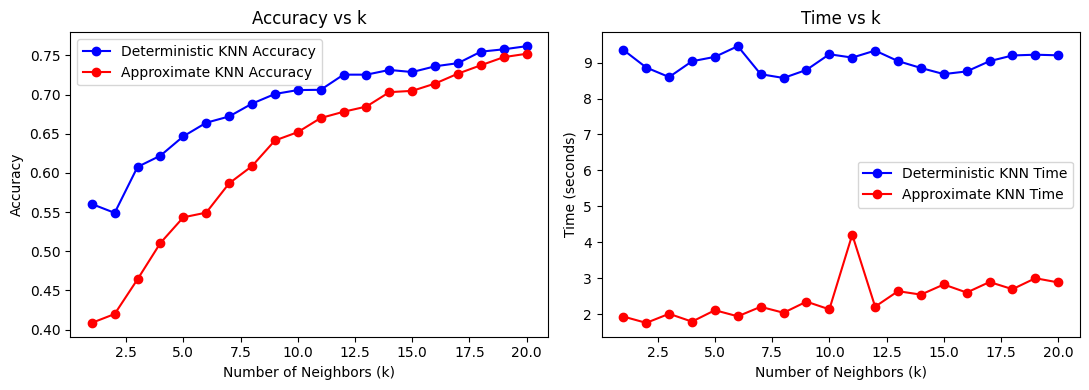

In [ ]:
'''
Plot the results of the experiment above.
'''

plt.figure(figsize=(11, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(range(k_start, k_end + 1), det_accuracies, label='Deterministic KNN Accuracy', marker='o', color='blue')
plt.plot(range(k_start, k_end + 1), random_accuracies, label='Approximate KNN Accuracy', marker='o', color='red')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.legend()

# Time plot
plt.subplot(1, 2, 2)
plt.plot(range(k_start, k_end + 1), det_times, label='Deterministic KNN Time', marker='o', color='blue')
plt.plot(range(k_start, k_end + 1), random_times, label='Approximate KNN Time', marker='o', color='red')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Time (seconds)')
plt.title('Time vs k')
plt.legend()

plt.tight_layout()
# plt.show()

# save the results
plt.savefig('/content/gdrive/MyDrive/24X/M76/Final_Project_Code/kANN-kNN-initial-comparison.png')

In [ ]:
'''
 Keep this but not using this right now
'''

def calculate_match_percentage(random_indices, exact_indices):
    total_matches = 0
    total_elements = 0

    for random_list, exact_list in zip(random_indices, exact_indices):
        # Convert both lists to numpy arrays for element-wise comparison
        random_array = np.array(random_list)
        exact_array = np.array(exact_list)

        # Calculate the number of matches in this specific list
        matches = np.sum(random_array == exact_array)
        total_matches += matches
        total_elements += len(random_array)  # All lists are of the same length

    # Calculate the percentage of matches
    match_percentage = (total_matches / total_elements) * 100
    return match_percentage

# Assuming random_neighbors_indices and neighbors_indices are defined
percentage = calculate_match_percentage(random_neighbors_indices, neighbors_indices)
print(f"Percentage of matching items: {percentage:.2f}%")

Percentage of matching items: 89.21%


## Part 2: kANN in Semi-Supervised Graph Learning Algorithms

Recall that semi-supervised learning is defined as ____.

In [3]:
def brute_force_all_knn(X, k=5):
  '''
  Parameters:
  - X is the data
  - k is the number of neighbors to consider

  Returns:
  - the indices of the k nearest neighbors for each data point
  '''

  n_samples = X.shape[0]
  knn_indices = np.zeros((n_samples, k), dtype=int)

  for i, query in enumerate(X):
      # Ensure query is a 2D array with shape (1, n_features)
      query_dense = query.reshape(1, -1) if isinstance(query, np.ndarray) else query.toarray()
      distances = euclidean_distances(query_dense, X).flatten()
      nearest_indices = np.argsort(distances)[1:k+1]
      knn_indices[i] = nearest_indices

  return knn_indices

def randomiozed_all_kann(X, k=5):
  '''
  Parameters:
  X is the data
  k is the number of neighbors to consider

  Returns:
  the indices of the k nearest neighbors for each data point
  '''

  # Initialize the pynndescent index with the dataset X
  index = pynndescent.NNDescent(X, n_neighbors=k, random_state=42)  # Preprocessing
  kann_indices, _ = index.query(X, k=k)                             # Query

  return kann_indices

In [4]:
def my_kneighbors_graph(knn_func, X, k=5):
  """
  Constructs a k-nearest neighbors graph using the kNN function knn_func for a given dataset X

  Parameters:
  - knn_func: kNN function to be used.
  - X: data in the shape (n_samples, n_features).
  - k: number of neighbors.

  Returns:
  - A k-nearest neighbors graph in the form of an adjacency matrix.
  """

  # get kNN/kANN from using functions in above cell
  if (knn_func == 'brute'):
    neighbors_indices = brute_force_all_knn(X, k)
  elif (knn_func == 'randomized'):
    neighbors_indices = randomiozed_all_kann(X, k)
  else:
    raise ValueError("knn_func must be 'brute' or 'randomized'")

  # Initialize the adjacency matrix for the graph
  n_samples = X.shape[0]
  adj_matrix = lil_matrix((n_samples, n_samples))

  # fill the adjacency matrix
  for i in range(n_samples):
    for j in neighbors_indices[i]:
      # add "edge" and make sure it is undirected
      adj_matrix[i, j] = 1
      adj_matrix[j, i] = 1

  return adj_matrix

In [5]:
from numba import njit, prange

In [6]:
@njit(parallel=False) # can toggle this based on if you want to parallelize or not
def propagated_labels_parallel(adj_matrix, label_matrix, alpha, max_iter, tol):
    '''
    Algorithem to parallelize label propagation

    Parameters:
    - adj_matrix: adjacency matrix of the graph
    - label_matrix: initial label matrix
    - alpha: clamping factor (between 0 and 1)
    - max_iter: maximum number of iterations
    - tol: tolerance for convergence

    Returns:
    - final label matrix after label propagation
    '''

    n_samples, n_classes = label_matrix.shape
    for _ in range(max_iter):
        label_matrix_prev = label_matrix.copy()

        # Dense matrix multiplication
        label_matrix = alpha * adj_matrix.dot(label_matrix_prev) + (1 - alpha) * label_matrix_prev

        # Early stopping
        if np.linalg.norm(label_matrix - label_matrix_prev) < tol:
            break
    return label_matrix

In [7]:
def optimized_label_propagation(X, labels, adj_matrix, max_iter=100, alpha=0.99, tol=1.3):
    '''
    Optimized label propagation algorithm using numba for parallelization and early stopping.

    Parameters:
    - X: input data
    - labels: initial labels (-1 for unlabeled)
    - adj_matrix: precomputed adjacency matrix (K-NN graph)
    - max_iter: maximum number of iterations for propagation
    - alpha: clamping factor (between 0 and 1)

    Returns:
    - propagated_labels: final predicted labels after propagation
    '''

    n_samples = X.shape[0]
    n_classes = np.max(labels) + 1

    label_matrix = np.zeros((n_samples, n_classes))

    # Initialize label matrix
    for i, label in enumerate(labels):
        if label != -1:
            label_matrix[i, label] = 1

    # Use numba to parallelize the propagation
    label_matrix = propagated_labels_parallel(adj_matrix, label_matrix, alpha, max_iter, tol)

    propagated_labels = np.argmax(label_matrix, axis=1)
    return propagated_labels

In [8]:
def label_propagation(X, labels, adj_matrix, max_iter=100, alpha=0.99):
    """
    Label propagation algorithm using the precomputed adjacency matrix.

    Parameters:
    - X: input data
    - labels: initial labels (-1 for unlabeled)
    - adj_matrix: precomputed adjacency matrix (K-NN graph)
    - max_iter: maximum number of iterations for propagation
    - alpha: clamping factor (between 0 and 1)

    Returns:
    - propagated_labels: final predicted labels after propagation
    """
    n_samples = X.shape[0]
    label_matrix = np.zeros((n_samples, np.max(labels) + 1))

    # Initialize label matrix
    for i, label in enumerate(labels):
        if label != -1:
            label_matrix[i, label] = 1

    # Propagation loop
    for _ in range(max_iter):
        label_matrix = alpha * adj_matrix.dot(label_matrix) + (1 - alpha) * label_matrix

    propagated_labels = np.argmax(label_matrix, axis=1)
    return propagated_labels

In [9]:
def run_kneighbors_graph_predict(knn_func, X, labels, k=5, plot=True, optimized=False):
  '''
  constructs a knn graph and uses a semi-supervised label propagation algorithm to predict labels

  Parameters:
  - knn_func: kNN function to be used.
  - X: data in the shape (n_samples, n_features).
  - labels: initial labels (-1 for unlabeled)
  - k: number of neighbors.
  - plot: if True, plots the results

  Returns:
  - predicted_labels: final predicted labels after propagation
  '''

  # Construct a K-NN Graph using custom KNN method
  start_time = time.time()
  custom_knn_graph = my_kneighbors_graph(knn_func, X, k)
  end_time = time.time()
  knn_graph_time = end_time - start_time
  print(f'knn graph time: {knn_graph_time:.3f} seconds')

  # Convert the K-NN graph to a row-normalized adjacency matrix for propagation
  row_sums = np.array(custom_knn_graph.sum(axis=1)).flatten()
  adj_matrix_normalized = custom_knn_graph.multiply(1 / row_sums[:, None])

  # Convert to dense matrix (necessary for the label propagation function)
  adj_matrix_dense = adj_matrix_normalized.toarray()

  # Run custom label propagation
  if optimized:
    predicted_labels = optimized_label_propagation(X, labels, adj_matrix_dense)
  else:
    predicted_labels = label_propagation(X, labels, adj_matrix_dense)

  if plot:
    # Prediction and Visualization
    plt.figure(figsize=(8, 6))

    # Plot points that were not initially labeled with a lighter color
    unlabeled_mask = (labels == -1)
    plt.scatter(X[unlabeled_mask, 0], X[unlabeled_mask, 1],
                c=predicted_labels[unlabeled_mask], cmap=plt.cm.rainbow,
                edgecolors='none', s=50, alpha=0.3, label='Unlabeled Points')

    # Plot points that were initially labeled with a solid color
    labeled_mask = (labels != -1)
    plt.scatter(X[labeled_mask, 0], X[labeled_mask, 1],
                c=predicted_labels[labeled_mask], cmap=plt.cm.rainbow,
                edgecolors='k', s=100, alpha=1.0, label='Labeled Points')

    plt.title("Approximate kNN Graph-Based Semi-Supervised Learning Results")
    plt.legend()
    # plt.show()
    plt.savefig('/content/gdrive/MyDrive/24X/M76/Final_Project_Code/large_moon_dataset_approximate_kANN_final_labels.png')

  return predicted_labels

In [ ]:
def generate_moon_set(n_samples=5000, percent_labeled=0.025, noise=0.15, plot=True):
  '''
  Generates a moon-shaped "toy" dataset with a specified percentage of data labeled.

  Parameters:
  - n_samples: Total number of samples in the dataset.
  - percent_labeled: Percentage of data to be labeled (between 0 and 1).
  - noise: Standard deviation of the Gaussian noise added to the data.
  - plot: If True, plots the dataset with only the labeled points highlighted.

  Returns:
  - X: Input data with shape (n_samples, 2).
  - lables: Labels with shape (n_samples,). A -1 label indicates unlabeled data.
  - original_labels: Original labels without modification.
  - labeled_indices: Indices of the labeled data.
  '''

  # Calculate the number of labeled samples
  n_labeled = int(n_samples * percent_labeled)

  # Create the Dataset
  np.random.seed(0)
  X, y = make_moons(n_samples=n_samples, noise=noise)

  # keep original labels for later comparison; then remove labels and keep
  # only a small percentage
  original_labels = np.copy(y)
  rng = np.random.RandomState(0)
  labels = np.full(y.shape, -1)
  labeled_indices = rng.choice(len(y), size=n_labeled, replace=False)
  labels[labeled_indices] = y[labeled_indices]

  # Plot the dataset with only the labeled points highlighted
  if plot:
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c='gray', edgecolors='none', s=50, alpha=0.5)
    plt.scatter(X[labeled_indices, 0], X[labeled_indices, 1], c=y[labeled_indices], cmap=plt.cm.rainbow, edgecolors='k', s=100)
    plt.title("Initial Dataset with Only Labeled Points Highlighted")
    plt.show()
    # plt.savefig('/content/gdrive/MyDrive/24X/M76/Final_Project_Code/large_moon_dataset_unlabeled.png')

  return X, labels, original_labels, labeled_indices

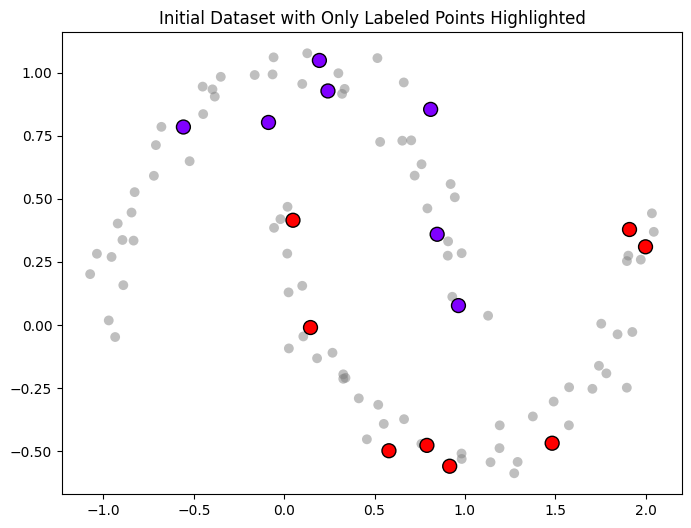

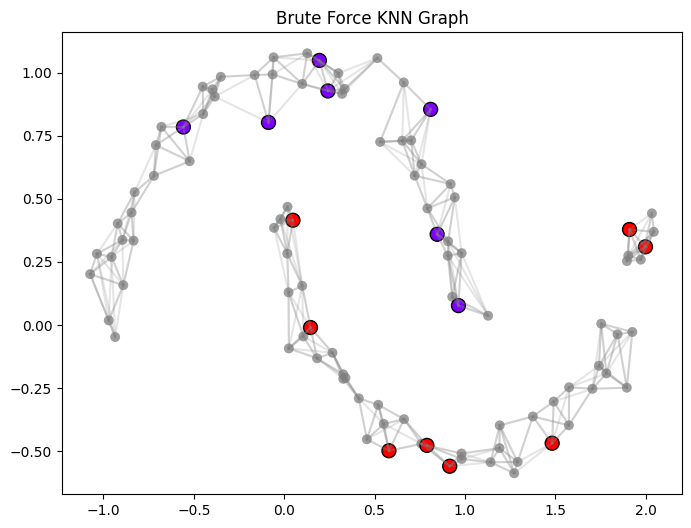

Label propogation using brute force kNN
knn graph time: 0.023 seconds


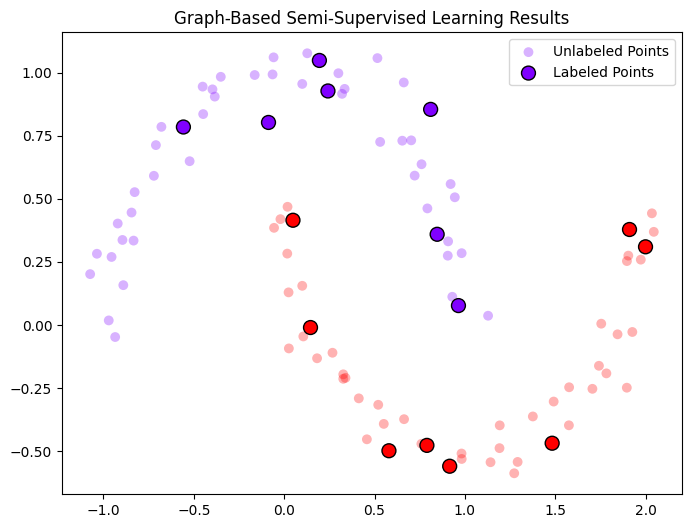

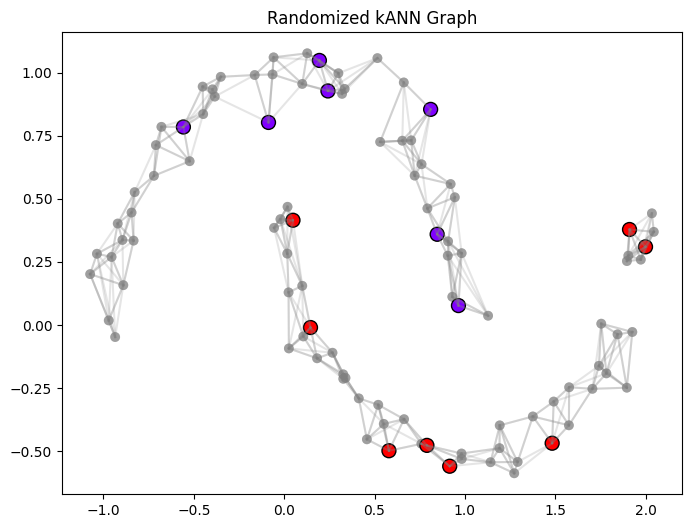

Label propogation using randomized kANN
knn graph time: 23.957 seconds


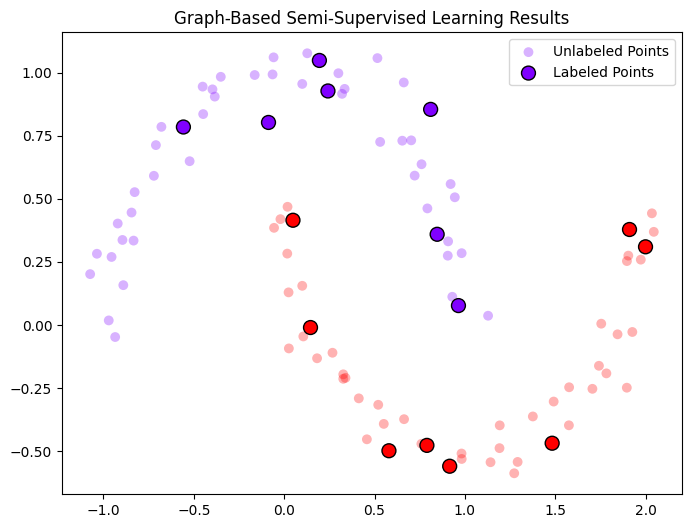

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
# generate small dataset
X, labels, original_labels, labeled_indices = generate_moon_set(n_samples=100, percent_labeled=0.15, noise=0.075, plot=True)
k=5

# make the brute force graph and plot it
neighbors_indices = brute_force_all_knn(X, k)
plt.figure(figsize=(8, 6))

# Plot the KNN graph
for i in range(X.shape[0]):
    for j in neighbors_indices[i]:
        plt.plot([X[i, 0], X[j, 0]], [X[i, 1], X[j, 1]], color='gray', alpha=0.2)

# Plot the points
plt.scatter(X[:, 0], X[:, 1], c='gray', edgecolors='none', s=50, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c='gray', edgecolors='none', s=50, alpha=0.5)
plt.scatter(X[labeled_indices, 0], X[labeled_indices, 1], c=labels[labeled_indices], cmap=plt.cm.rainbow, edgecolors='k', s=100)
plt.title("Brute Force KNN Graph")
plt.show()

print("Label propogation using brute force kNN")
run_kneighbors_graph_predict('brute', X, labels, k=k)


# make the randomized approximate graph and plot it
neighbors_indices = brute_force_all_knn(X, k)
plt.figure(figsize=(8, 6))

# Plot the KNN graph
for i in range(X.shape[0]):
    for j in neighbors_indices[i]:
        plt.plot([X[i, 0], X[j, 0]], [X[i, 1], X[j, 1]], color='gray', alpha=0.2)

# Plot the points
plt.scatter(X[:, 0], X[:, 1], c='gray', edgecolors='none', s=50, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c='gray', edgecolors='none', s=50, alpha=0.5)
plt.scatter(X[labeled_indices, 0], X[labeled_indices, 1], c=labels[labeled_indices], cmap=plt.cm.rainbow, edgecolors='k', s=100)
plt.title("Randomized kANN Graph")
plt.show()

print("Label propogation using randomized kANN")
run_kneighbors_graph_predict('randomized', X, labels, k=k)


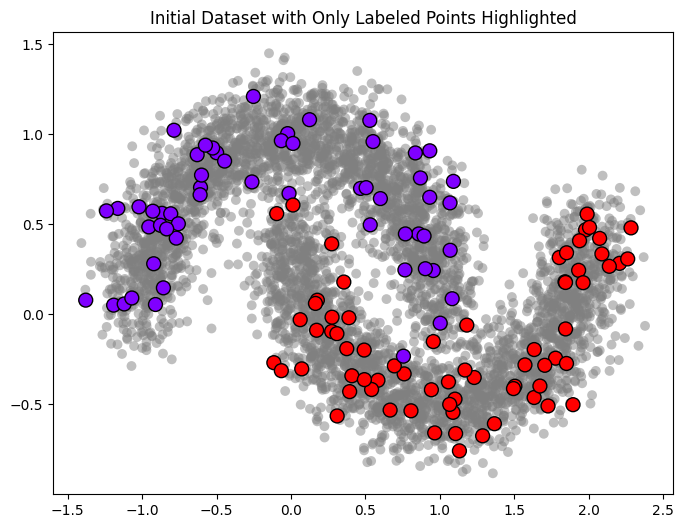

knn graph time: 5.131 seconds


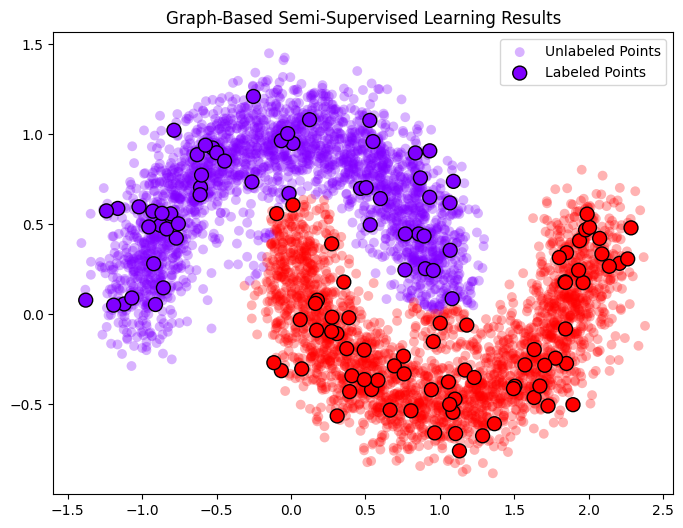

Brute Force Accuracy: 0.976
Brute Force Time: 9.50 seconds


In [ ]:
# label points using brute force approach
X, labels, original_labels, _ = generate_moon_set(n_samples=5000, percent_labeled=0.025, noise=0.15, plot=True)
brute_start_time = time.time()
brute_labels = run_kneighbors_graph_predict('brute', X, labels, k=5)
brute_end_time = time.time()
brute_time = brute_end_time - brute_start_time
brute_accuracy = accuracy_score(original_labels, brute_labels)

# print results
print(f'Brute Force Accuracy: {brute_accuracy:.3f}')
print(f'Brute Force Time: {brute_time:.2f} seconds')

knn graph time: 2.843 seconds
Randomized Accuracy: 0.977
Randomized Time: 8.58 seconds


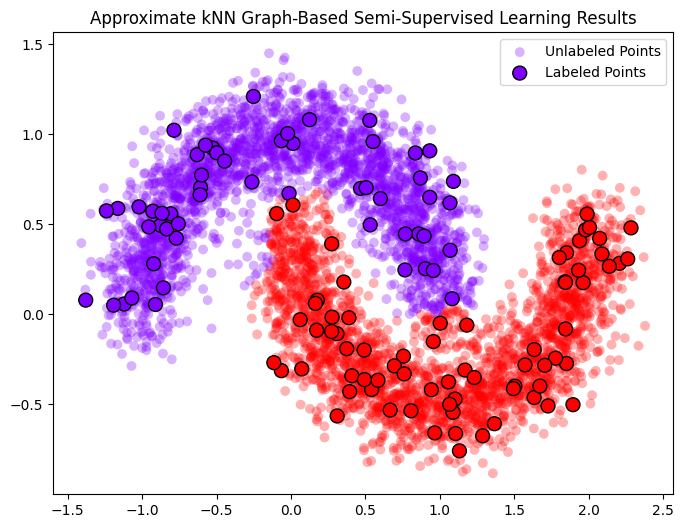

In [ ]:
# label points using randomized approach
X, labels, original_labels, _ = generate_moon_set(n_samples=5000, percent_labeled=0.025, noise=0.15, plot=False)
randomized_start_time = time.time()
randomized_labels = run_kneighbors_graph_predict('randomized', X, labels, k=5)
randomized_end_time = time.time()
randomized_time = randomized_end_time - randomized_start_time
randomized_accuracy = accuracy_score(original_labels, randomized_labels)

# print results
print(f'Randomized Accuracy: {randomized_accuracy:.3f}')
print(f'Randomized Time: {randomized_time:.2f} seconds')

In [10]:
from keras.datasets import mnist
from sklearn.decomposition import PCA

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 50)


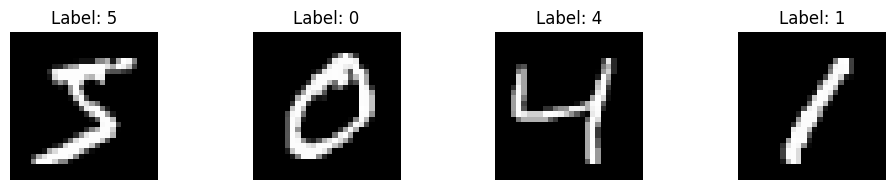

In [11]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Use the training data for semi-supervised learning
# X = X_train.reshape(X_train.shape[0], -1)  # Flatten to 784 dimensions (28x28)
# y = y_train.flatten()

# Create a figure with a single row of subplots
num_images = 4
fig, axes = plt.subplots(1, num_images, figsize=(10, 2))

# Display the images and their labels
for i in range(num_images):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].set_title(f'Label: {y_train[i]}')
    axes[i].axis('off')

plt.tight_layout()
# plt.savefig('/content/gdrive/MyDrive/24X/M76/Final_Project_Code/MNIST_labels.png')

# Normalize the data
X_normal = X_train.astype('float32') / 255.0

# Flatten the images to 28 * 28 = 784 dimensions
X_flat = X_normal.reshape(X_normal.shape[0], -1)
y = y_train.flatten()

# Apply PCA to reduce dimensionality to the first 50 principle components
pca = PCA(n_components=50)
X = pca.fit_transform(X_flat)

# Keep a copy of the original labels for later comparison
original_labels = np.copy(y)

# Simulate an unlabeled scenario by setting a portion of y to -1
labels = y.astype(np.int32)
rng = np.random.RandomState(42)
unlabeled_mask = rng.rand(len(labels)) > 0.1  # Keep 10% labeled, 90% unlabeled
labels[unlabeled_mask] = -1

# print shape of X
print(X.shape)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

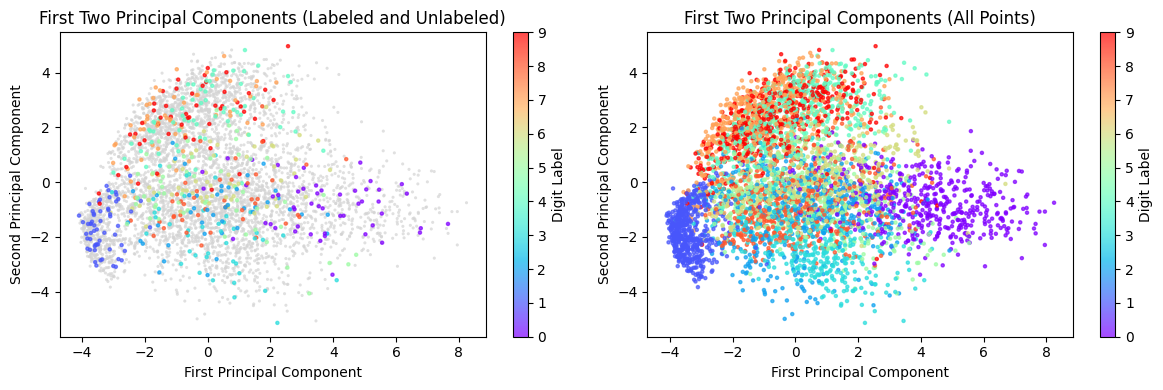

In [12]:
'''
Print the first 2 principle components of the dataset
Goal: see how the data is distributed/clustered
'''
# Subset to the first 5000 points
X_pca_subset = X[:5000]
original_labels_subset = y[:5000]

# Separate labeled and unlabeled data
labeled_mask = labels != -1
unlabeled_mask = labels == -1
labeled_mask = labeled_mask[:5000]
unlabeled_mask = unlabeled_mask[:5000]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# First plot: Labeled and unlabeled points
axes[0].scatter(X_pca_subset[unlabeled_mask, 0], X_pca_subset[unlabeled_mask, 1],
                c='lightgray', edgecolors='none', s=5, alpha=0.7)
axes[0].scatter(X_pca_subset[labeled_mask, 0], X_pca_subset[labeled_mask, 1],
                c=original_labels_subset[labeled_mask], cmap=plt.cm.rainbow, s=5, alpha=0.7)
axes[0].set_title('First Two Principal Components (Labeled and Unlabeled)')
axes[0].set_xlabel('First Principal Component')
axes[0].set_ylabel('Second Principal Component')

# Second plot: All points with their labels
sc = axes[1].scatter(X_pca_subset[:, 0], X_pca_subset[:, 1],
                     c=original_labels_subset, cmap=plt.cm.rainbow, s=5, alpha=0.7)
axes[1].set_title('First Two Principal Components (All Points)')
axes[1].set_xlabel('First Principal Component')
axes[1].set_ylabel('Second Principal Component')

# Add colorbar to plots
plt.colorbar(sc, ax=axes[0], label='Digit Label')
plt.colorbar(sc, ax=axes[1], label='Digit Label')

# display plot
plt.tight_layout()
plt.show()
# plt.savefig('/content/gdrive/MyDrive/24X/M76/Final_Project_Code/first2_MNIST_pca_components.png')

# # Plot the first three principal components for the first 5000 points
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Plot unlabeled points in light gray
# ax.scatter(X_pca_subset[unlabeled_mask, 0], X_pca_subset[unlabeled_mask, 1], X_pca_subset[unlabeled_mask, 2],
#            c='lightgray', edgecolors='none', s=5, alpha=0.7)

# # Plot labeled points in their respective colors
# sc = ax.scatter(X_pca_subset[labeled_mask, 0], X_pca_subset[labeled_mask, 1], X_pca_subset[labeled_mask, 2],
#                 c=original_labels_subset[labeled_mask], cmap=plt.cm.rainbow, s=5, alpha=0.7)

# # Add labels and title
# ax.set_xlabel('First Principal Component')
# ax.set_ylabel('Second Principal Component')
# ax.set_zlabel('Third Principal Component')
# ax.set_title('First Three Principal Components of MNIST Data (First 5000 Points)')

# # Add colorbar
# plt.colorbar(sc, label='Digit Label')

# # Show the plot
# plt.show()

In [14]:
# Run the label propagation algorithm
random_start_time = time.time()
randomized_labels = run_kneighbors_graph_predict('randomized', X, labels, k=5, plot=False)
random_end_time = time.time()
random_time = random_end_time - random_start_time

brute_start_time = time.time()
brute_labels = run_kneighbors_graph_predict('brute', X, labels, k=5, plot=False)
brute_end_time = time.time()
brute_time = brute_end_time - brute_start_time

# Assess accuracy
random_accuracy = accuracy_score(original_labels, randomized_labels)
brute_accuracy = accuracy_score(original_labels, brute_labels)

print(f'Randomized Accuracy: {random_accuracy:.3f}')
print(f'Brute Accuracy: {brute_accuracy:.3f}')
print(f'Randomized Time: {(random_time / 60):.2f} minutes')
print(f'Brute Time: {(brute_time / 60):.2f} minutes')

knn graph time: 6.178 seconds
knn graph time: 1045.633 seconds
Randomized Accuracy: 0.954
Brute Accuracy: 0.932
Randomized Time: 1.76 minutes
Brute Time: 19.09 minutes


In [ ]:
# run optimized label probagation (only for approximate becuase brute is going to suck either way)
random_start_time = time.time()
randomized_labels = run_kneighbors_graph_predict('randomized', X, labels, k=5, plot=False, optimized=True)
random_end_time = time.time()
random_time = random_end_time - random_start_time

# Assess accuracy
random_accuracy = accuracy_score(original_labels, randomized_labels)

print(f'Randomized Accuracy: {random_accuracy:.3f}')
print(f'Randomized Time: {(random_time):.2f} seconds')

Randomized Accuracy: 0.966
Randomized Time: 16.80 seconds


In [ ]:
'''
Test optimized kANN version for different values of k
'''

k_vals = range(2, 16)
results = []

for k in k_vals:
    print(f"Running kANN/label propagation with k={k}")

    start_time = time.time()
    randomized_labels = run_kneighbors_graph_predict('randomized', X, labels, k=k, plot=False, optimized=True)
    end_time = time.time()
    total_time = end_time - start_time

    accuracy = accuracy_score(original_labels, randomized_labels)

    results.append({
        'k': k,
        'accuracy': accuracy,
        'time': total_time
    })

results_df = pd.DataFrame(results)
print(results_df)

Running kANN/label propagation with k=2
knn graph time: 4.812 seconds
Running kANN/label propagation with k=3
knn graph time: 5.492 seconds
Running kANN/label propagation with k=4
knn graph time: 6.020 seconds
Running kANN/label propagation with k=5
knn graph time: 6.537 seconds
Running kANN/label propagation with k=6
knn graph time: 7.003 seconds
Running kANN/label propagation with k=7
knn graph time: 7.693 seconds
Running kANN/label propagation with k=8
knn graph time: 8.077 seconds
Running kANN/label propagation with k=9
knn graph time: 8.694 seconds
Running kANN/label propagation with k=10
knn graph time: 9.284 seconds
Running kANN/label propagation with k=11
knn graph time: 11.535 seconds
Running kANN/label propagation with k=12
knn graph time: 9.895 seconds
Running kANN/label propagation with k=13
knn graph time: 10.533 seconds
Running kANN/label propagation with k=14
knn graph time: 11.163 seconds
Running kANN/label propagation with k=15
knn graph time: 11.563 seconds
     k  ac

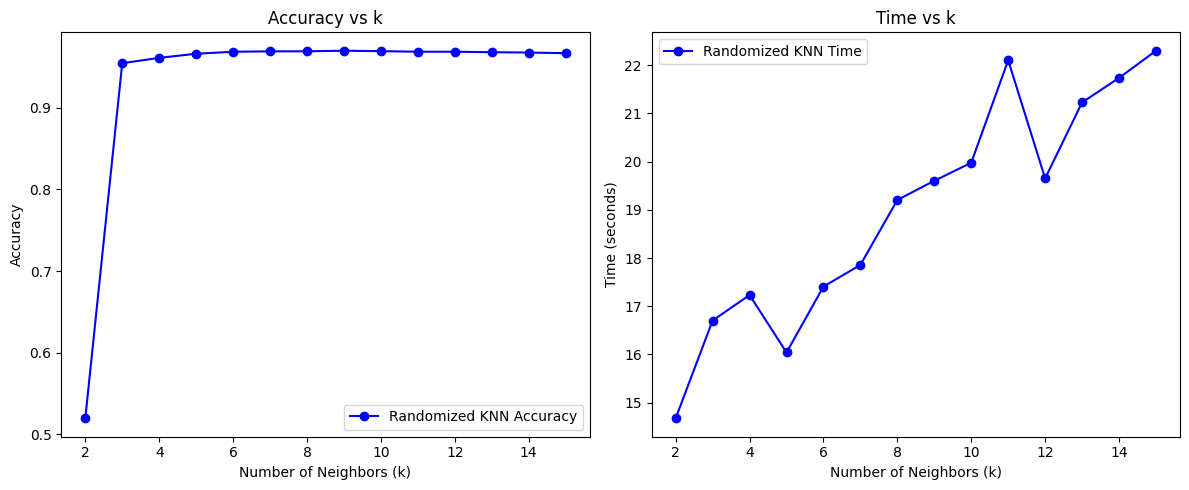

In [ ]:
'''
Plot the data from the above cell
'''

# extract features from df
k_values = results_df['k']
random_accuracies = results_df['accuracy']
random_times = results_df['time']

# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(k_values, random_accuracies, label='Randomized KNN Accuracy', marker='o', color='blue')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.legend()

# Time plot
plt.subplot(1, 2, 2)
plt.plot(k_values, random_times, label='Randomized KNN Time', marker='o', color='blue')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Time (seconds)')
plt.title('Time vs k')
plt.legend()

# Show the plots
plt.tight_layout()
plt.savefig('/content/gdrive/MyDrive/24X/M76/Final_Project_Code/fully_optmized_k_range.png')